In [33]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
df = pd.read_csv("../datasets/fertilizer_prediction.csv")
df

,Temperature,Humidity,Moisture,pH,N,P,K,Crop,Fertilizer
0,32.0,60.0,45.0,6.0,0.4,0.5,0.8,Maize,Good NPK
1,35.0,66.0,48.0,5.8,0.2,0.7,0.6,Maize,MOP
2,35.0,66.0,48.0,5.8,0.2,0.7,0.6,Maize,Urea
3,29.0,36.0,17.0,6.5,0.3,0.7,0.6,Maize,MOP
4,29.0,36.0,17.0,6.5,0.3,0.7,0.6,Maize,Urea
...,...,...,...,...,...,...,...,...,...
1915,31.0,48.0,66.0,6.0,0.8,0.8,0.9,Sugarcane,Good NPK
1916,31.0,48.0,66.0,6.0,0.9,0.8,0.9,Sugarcane,Good NPK
1917,35.0,54.0,71.0,6.4,0.7,0.9,0.9,Sugarcane,Good NPK
1918,35.0,54.0,71.0,6.4,0.8,0.9,0.9,Sugarcane,Good NPK


In [35]:
df = df.drop_duplicates()
df

,Temperature,Humidity,Moisture,pH,N,P,K,Crop,Fertilizer
0,32.0,60.0,45.0,6.0,0.4,0.5,0.8,Maize,Good NPK
1,35.0,66.0,48.0,5.8,0.2,0.7,0.6,Maize,MOP
2,35.0,66.0,48.0,5.8,0.2,0.7,0.6,Maize,Urea
3,29.0,36.0,17.0,6.5,0.3,0.7,0.6,Maize,MOP
4,29.0,36.0,17.0,6.5,0.3,0.7,0.6,Maize,Urea
...,...,...,...,...,...,...,...,...,...
1915,31.0,48.0,66.0,6.0,0.8,0.8,0.9,Sugarcane,Good NPK
1916,31.0,48.0,66.0,6.0,0.9,0.8,0.9,Sugarcane,Good NPK
1917,35.0,54.0,71.0,6.4,0.7,0.9,0.9,Sugarcane,Good NPK
1918,35.0,54.0,71.0,6.4,0.8,0.9,0.9,Sugarcane,Good NPK


In [36]:
label_encoder = LabelEncoder()
df['Crop'] = label_encoder.fit_transform(df['Crop'])
df['Fertilizer'] = label_encoder.fit_transform(df['Fertilizer'])
df

,Temperature,Humidity,Moisture,pH,N,P,K,Crop,Fertilizer
0,32.0,60.0,45.0,6.0,0.4,0.5,0.8,4,1
1,35.0,66.0,48.0,5.8,0.2,0.7,0.6,4,2
2,35.0,66.0,48.0,5.8,0.2,0.7,0.6,4,3
3,29.0,36.0,17.0,6.5,0.3,0.7,0.6,4,2
4,29.0,36.0,17.0,6.5,0.3,0.7,0.6,4,3
...,...,...,...,...,...,...,...,...,...
1915,31.0,48.0,66.0,6.0,0.8,0.8,0.9,6,1
1916,31.0,48.0,66.0,6.0,0.9,0.8,0.9,6,1
1917,35.0,54.0,71.0,6.4,0.7,0.9,0.9,6,1
1918,35.0,54.0,71.0,6.4,0.8,0.9,0.9,6,1


In [37]:
X = df.drop(['Fertilizer'], axis='columns')
y = df['Fertilizer']

In [38]:
y = to_categorical(y, int(y.max()+1))
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [39]:
display(X, X.shape)
display(y, y.shape)

,Temperature,Humidity,Moisture,pH,N,P,K,Crop
0,32.0,60.0,45.0,6.0,0.4,0.5,0.8,4
1,35.0,66.0,48.0,5.8,0.2,0.7,0.6,4
2,35.0,66.0,48.0,5.8,0.2,0.7,0.6,4
3,29.0,36.0,17.0,6.5,0.3,0.7,0.6,4
4,29.0,36.0,17.0,6.5,0.3,0.7,0.6,4
...,...,...,...,...,...,...,...,...
1915,31.0,48.0,66.0,6.0,0.8,0.8,0.9,6
1916,31.0,48.0,66.0,6.0,0.9,0.8,0.9,6
1917,35.0,54.0,71.0,6.4,0.7,0.9,0.9,6
1918,35.0,54.0,71.0,6.4,0.8,0.9,0.9,6


(1920, 8)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

(1920, 4)

In [40]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [42]:
model = Sequential()
model.add(Input((len(X.columns),)))
model.add(Dense(32, kernel_initializer="uniform", activation='relu'))
model.add(Dense(32, kernel_initializer="uniform", activation='relu'))
model.add(Dense(y.shape[1], kernel_initializer="uniform", activation='softmax'))

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)

In [45]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 0.360062837600708
Test accuracy: 0.8055555820465088


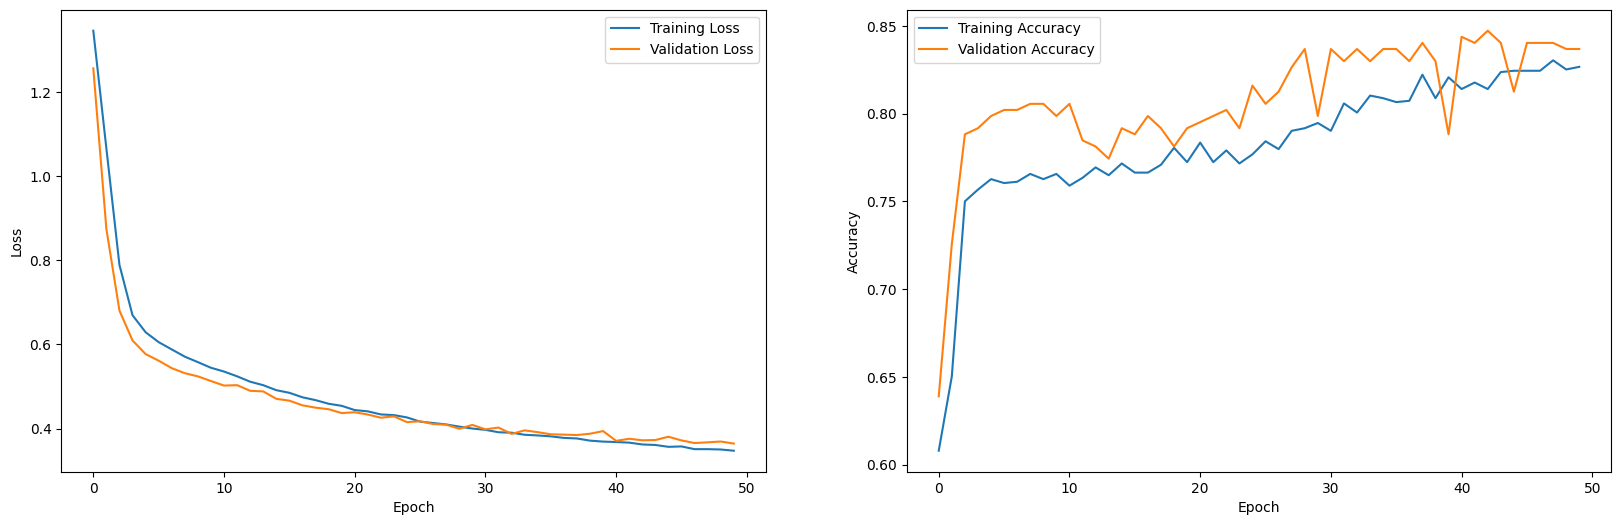

In [46]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [62]:
output_values = model.predict(X_test)

print("Output values for the new inputs:")
print(output_values[100])
for i in output_values[100]:
    print(f"{i:.2f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Output values for the new inputs:
[0.03188918 0.00884275 0.7015804  0.2576877 ]
0.03
0.01
0.70
0.26
